In [1]:
! pip install pywph==1.0

Reason for being yanked: Wrong requirements.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pywph as pw
import torch

In [3]:
# importing files from google drive
from google.colab import drive
drive.mount('/content/drive')

nbody = np.load('drive/MyDrive/camels data/Maps_Mtot_Nbody_SIMBA_LH_z=0.00.npy')
mgas = np.load('drive/MyDrive/camels data/Maps_Mgas_SIMBA_LH_z=0.00.npy')

Mounted at /content/drive


In [107]:
M, N = 256, 256
J = 7
L = 8
dn = 0

nbody_data = np.log(nbody[:10])
mgas_data = np.log(mgas[:10])

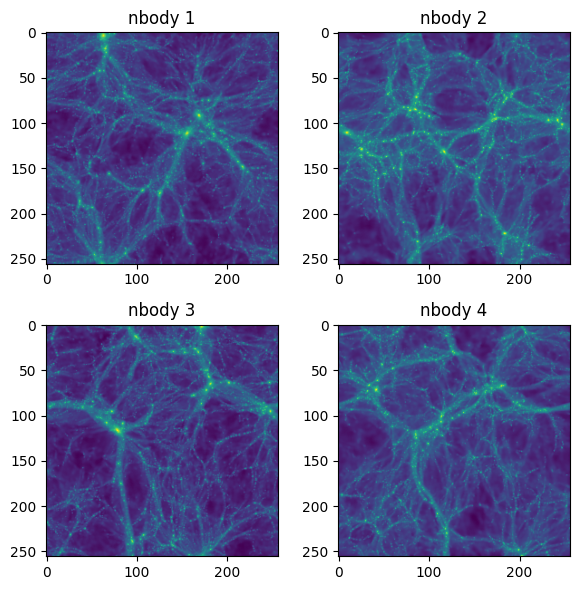

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

axs[0,0].imshow(nbody_data[0])
axs[0,1].imshow(nbody_data[1])
axs[1,0].imshow(nbody_data[2])
axs[1,1].imshow(nbody_data[3])

axs[0,0].set_title('nbody 1')
axs[0,1].set_title('nbody 2')
axs[1,0].set_title('nbody 3')
axs[1,1].set_title('nbody 4')

fig.tight_layout()
fig.show()

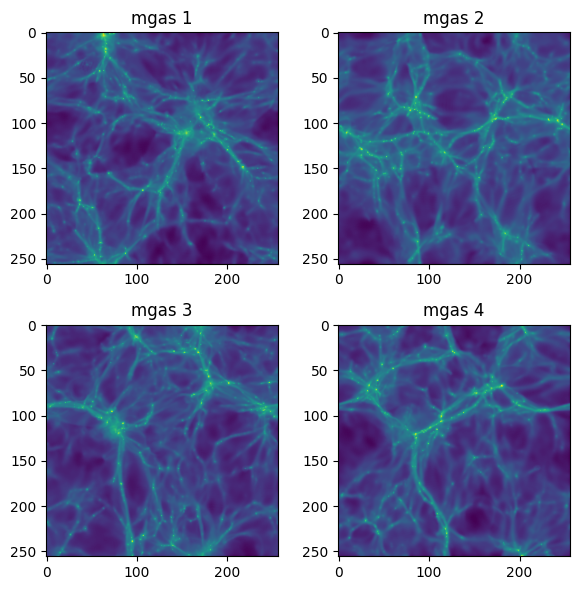

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

axs[0,0].imshow(mgas_data[0])
axs[0,1].imshow(mgas_data[1])
axs[1,0].imshow(mgas_data[2])
axs[1,1].imshow(mgas_data[3])

axs[0,0].set_title('mgas 1')
axs[0,1].set_title('mgas 2')
axs[1,0].set_title('mgas 3')
axs[1,1].set_title('mgas 4')

fig.tight_layout()
fig.show()

In [21]:
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn)

if torch.cuda.is_available():
    wph_op.to(0)

In [108]:
# WPH object
nbody_wph = wph_op(nbody_data, ret_wph_obj=True)
mgas_wph = wph_op(mgas_data, ret_wph_obj=True)


We only consider the real part for now.

In [115]:
def coeff_mean(list):
  """
  Calculate the mean WPH coefficients
  We only consider the real part here
  """
  list_mean = np.zeros(list.shape[0])
  for i in range(list.shape[0]):
    list_mean[i] = np.mean((list.real)[i])
  return list_mean

In [116]:
# coefficients
nbody_s11 = nbody_wph.get_coeffs("S11")[0]
nbody_s00 = nbody_wph.get_coeffs("S00")[0]
nbody_s01 = nbody_wph.get_coeffs("S01")[0]
nbody_c01 = nbody_wph.get_coeffs("C01")[0]
nbody_cphase = nbody_wph.get_coeffs("Cphase")[0]

mgas_s11 = mgas_wph.get_coeffs("S11")[0]
mgas_s00 = mgas_wph.get_coeffs("S00")[0]
mgas_s01 = mgas_wph.get_coeffs("S01")[0]
mgas_c01 = mgas_wph.get_coeffs("C01")[0]
mgas_cphase = mgas_wph.get_coeffs("Cphase")[0]

Text(0.5, 1.0, 'mean real coefficients of n-body simulation')

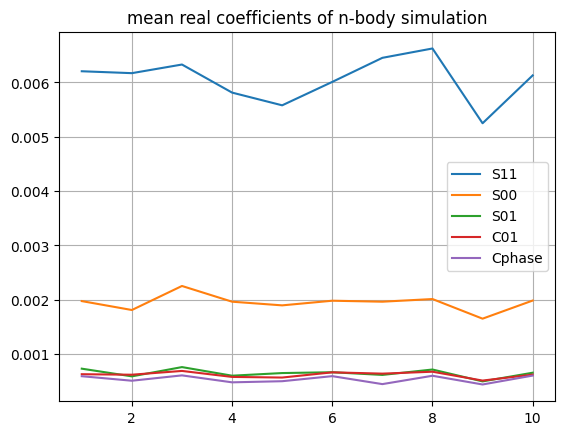

In [117]:
num = np.linspace(1,10,10)
plt.plot(num, coeff_mean(nbody_s11),label='S11')
plt.plot(num, coeff_mean(nbody_s00),label='S00')
plt.plot(num, coeff_mean(nbody_s01),label='S01')
plt.plot(num, coeff_mean(nbody_c01),label='C01')
plt.plot(num, coeff_mean(nbody_cphase),label='Cphase')
plt.legend()
plt.grid()
plt.title('mean real coefficients of n-body simulation')

Text(0.5, 1.0, 'mean real coefficients of mgas simulation')

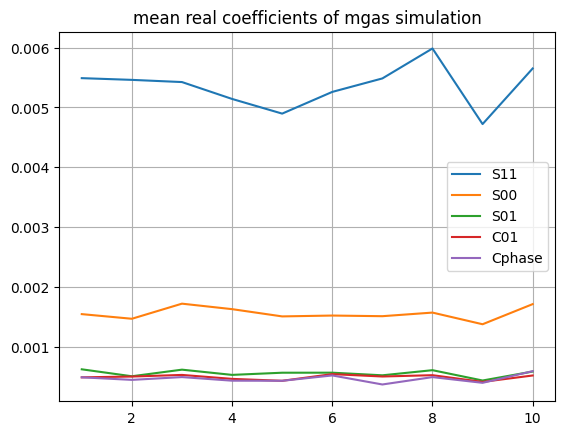

In [119]:
plt.plot(num, coeff_mean(mgas_s11),label='S11')
plt.plot(num, coeff_mean(mgas_s00),label='S00')
plt.plot(num, coeff_mean(mgas_s01),label='S01')
plt.plot(num, coeff_mean(mgas_c01),label='C01')
plt.plot(num, coeff_mean(mgas_cphase),label='Cphase')
plt.legend()
plt.grid()
plt.title('mean real coefficients of mgas simulation')

Now we consider the imaginary part.

In [123]:
def coeff_mean_complex(list):
  """
  Calculate the mean WPH coefficients
  We only consider the imaginary part here
  """
  list_mean = np.zeros(list.shape[0])
  for i in range(list.shape[0]):
    list_mean[i] = np.mean((list.imag)[i])
  return list_mean

Text(0.5, 1.0, 'mean complex coefficients of n-body simulation')

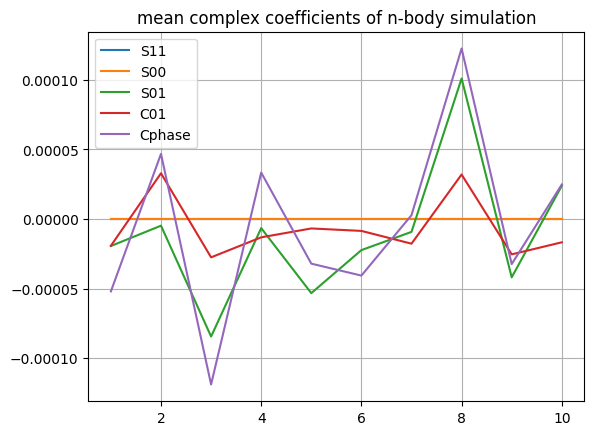

In [124]:
plt.plot(num, coeff_mean_complex(nbody_s11),label='S11')
plt.plot(num, coeff_mean_complex(nbody_s00),label='S00')
plt.plot(num, coeff_mean_complex(nbody_s01),label='S01')
plt.plot(num, coeff_mean_complex(nbody_c01),label='C01')
plt.plot(num, coeff_mean_complex(nbody_cphase),label='Cphase')
plt.legend()
plt.grid()
plt.title('mean complex coefficients of n-body simulation')

Text(0.5, 1.0, 'mean complex coefficients of mgas simulation')

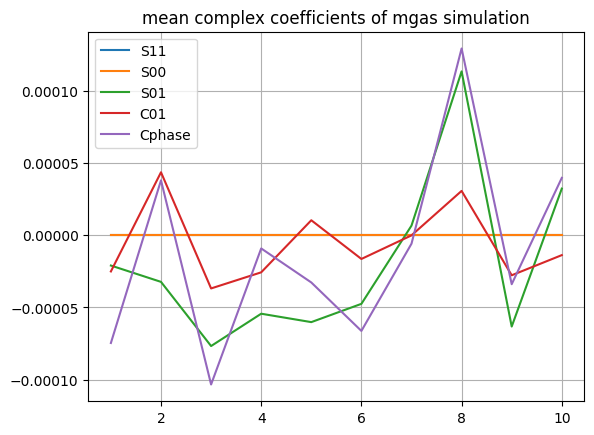

In [125]:
plt.plot(num, coeff_mean_complex(mgas_s11),label='S11')
plt.plot(num, coeff_mean_complex(mgas_s00),label='S00')
plt.plot(num, coeff_mean_complex(mgas_s01),label='S01')
plt.plot(num, coeff_mean_complex(mgas_c01),label='C01')
plt.plot(num, coeff_mean_complex(mgas_cphase),label='Cphase')

plt.legend()
plt.grid()
plt.title('mean complex coefficients of mgas simulation')